In [132]:
def pdf_to_list(loc):#The file in the location passed as parameter is convereted to list
    import PyPDF2
    f = open(loc,'rb')
    pdf_text = []
    pdf_reader = PyPDF2.PdfFileReader(f)
    for p in range(pdf_reader.numPages):
        page = pdf_reader.getPage(p)
        pdf_text.append(page.extractText())
    return pdf_text[0].split()

In [133]:
def txt_to_list(loc):#The file in the location passed as parameter is convereted to list
    f=open(loc,'r')
    pdf_text=[]
    ml=f.read()
    return ml.split()

In [134]:
def check_txt_or_pdf(loc):#function to check whether the directory passed is in .pdf or .txt format
    import re
    if re.search(".txt",loc):
        return "txt"
    if re.search(".pdf",loc):
        return "pdf"
    else:
        print("The file is not in supported format")
        

In [135]:
def common(l1,l2):#function to remove the sentence fillers from the common text in the files
    l1=set(l1)
    l2=set(l2)
    ts=l1.intersection(l2)
    return list(ts)

In [136]:
def create_list(loc):#function to rediret to formation of lists based on the file type
        if(check_txt_or_pdf(loc)=='pdf'):
            l=pdf_to_list(loc)
        else:
            l=txt_to_list(loc)
        return l

In [137]:
def counting_similar_tech_words(l,common_list):#function to count the common list_elements in either file
    counting_list=[]
    count=0
    for x in common_list:
        counting_list.append([x,l.count(x)])
    for x in counting_list:
        count+=x[1]
    return count

In [138]:
def lower(l):#returns the list with elementsin lower case
    tl=[]
    for x in l:
        tl.append(x.lower())
    return tl
    

In [139]:
def plotpie(per):#function for pie representation
    import matplotlib.pyplot as plt
    labels='similarity indicator',''
    sizes=[per,100-per]
    colors=['red','blue']
    plt.pie(sizes,labels=labels,colors=colors,)
    plt.axis('equal')
    plt.show()
    

In [140]:
def venn(l1,l2,l3):#function for venn representation
    from matplotlib_venn import venn2_unweighted
    from matplotlib import pyplot as plt
    venn2_unweighted(subsets=(len(l1),len(l2),len(l3)),set_labels=('File1','File2'))
    plt.show()

reference_file=file2
Both files are equal by 93.33333%


Button(description='indicator', style=ButtonStyle())

Button(description='Venn diagram', style=ButtonStyle())

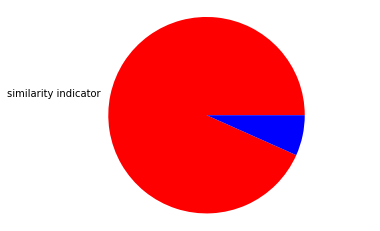

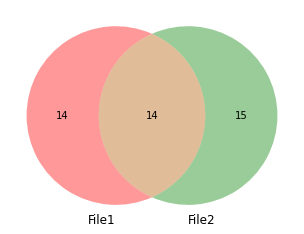

In [143]:
#main function
loc1="C:\\Users\\Srujan\\Desktop\\k.txt"#for testing some address is given
loc2="C:\\Users\\Srujan\\Desktop\\k2.txt"
l1=create_list(loc1)#creating the list of the data in the file
l1=lower(l1)
l2=create_list(loc2)
l2=lower(l2)
common_list=common(l1,l2)#common data in the lists of two files is created

if(len(l2)>len(l1)):
    print("reference_file=file2")
    per=(len(common_list)/len(l2))*100
    
else:
    print("reference_file=file1")
    per=(len(common_list)/len(l1))*100

print("Both files are equal by {k}%".format(k=round(per,5)))
import ipywidgets as widgets
from IPython.display import display
button = widgets.Button(description="indicator")
display(button)#display of button for indicator

def on_button_clicked(b):
    plotpie(per)

button.on_click(on_button_clicked)
button1 = widgets.Button(description="Venn diagram")
display(button1)#display of button for ven representation

def on_button_clicked(b):
    venn(l1,l2,common_list)
button1.on_click(on_button_clicked)